**Zulkifli Yasin Hidayatulloh**

Belajar Pengembangan Machine Learning

Data yang digunakan:
https://www.kaggle.com/yufengdev/bbc-fulltext-and-category

**Persiapan Data**

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zulkifliyasin","key":"88eaab44cc466174903163a241cc1107"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
#download dataset
!kaggle datasets download -d yufengdev/bbc-fulltext-and-category

  0% 0.00/1.83M [00:00<?, ?B/s]
100% 1.83M/1.83M [00:00<00:00, 61.6MB/s]


In [5]:
#unzip and save to dir
!mkdir bbc
!unzip bbc-fulltext-and-category.zip -d bbc
!ls bbc

Archive:  bbc-fulltext-and-category.zip
  inflating: bbc/bbc-text.csv        
bbc-text.csv


In [6]:
#import library untuk menyiapkan dataset dan proses cleaning data
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#read data
df = pd.read_csv('bbc/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


**Cleaning Data**

In [8]:
df.text = df.text.apply(lambda x: x.lower())
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
def remove_num(data):
    return re.sub('[0-9]+','',data)
stop_w = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in stop_w ]))

In [9]:
df.text = df.text.apply(lambda x: remove_punctuation(x))
df.text = df.text.apply(lambda x: remove_num(x))
df.text = df.text.apply(lambda x: stopword(x))
df

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading newcastle fa cup premiership side newc...
4,entertainment,ocean twelve raids box office ocean twelve cri...
...,...,...
2220,business,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy exchatshow h...
2222,entertainment,rem announce new glasgow concert us band rem a...
2223,politics,political squabbles snowball become commonplac...


In [10]:
#mengecek data kosong
df.isnull().values.any()

False

**Pelabelan Data**

In [11]:
#pelabelan data
category = pd.get_dummies(df.category)
df_category = pd.concat([df,category],axis=1)
df_category = df_category.drop(columns='category')
df_category

,text,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books alone former worldcom...,1,0,0,0,0
2,tigers wary farrell gamble leicester say rushe...,0,0,0,1,0
3,yeading newcastle fa cup premiership side newc...,0,0,0,1,0
4,ocean twelve raids box office ocean twelve cri...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull us retail figures us retail sales fe...,1,0,0,0,0
2221,kilroy unveils immigration policy exchatshow h...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem a...,0,1,0,0,0
2223,political squabbles snowball become commonplac...,0,0,1,0,0


In [12]:
#mengubah tipe data
news = df_category['text'].astype(str)
label = df_category[['business','entertainment','politics','sport','tech']].values

**Pemodelan Data**

In [13]:
#import library untuk pemodelan data
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [14]:
#split dataset kedalam data test dan data validasi
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size = 0.2)

In [15]:
#tokenasi
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [16]:
#membuat model sequential
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(128),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


In [17]:
#penggunaan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi train dan validasi lebih dari 90%, hentikan pelatihan model!")
      self.model.stop_training = True
callbacks = myCallback()

In [18]:
#melatih model
history = model.fit(padded_train, label_train, epochs=30, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks],validation_steps=7)

Epoch 1/30
56/56 - 138s - loss: 1.5389 - accuracy: 0.2798 - val_loss: 1.3414 - val_accuracy: 0.4697
Epoch 2/30
56/56 - 134s - loss: 1.2044 - accuracy: 0.5006 - val_loss: 1.0241 - val_accuracy: 0.7079
Epoch 3/30
56/56 - 136s - loss: 0.4865 - accuracy: 0.8494 - val_loss: 0.5739 - val_accuracy: 0.8562
Epoch 4/30
56/56 - 135s - loss: 0.2053 - accuracy: 0.9399 - val_loss: 0.3741 - val_accuracy: 0.8652
Epoch 5/30
56/56 - 135s - loss: 0.0803 - accuracy: 0.9764 - val_loss: 0.5128 - val_accuracy: 0.8315
Epoch 6/30
56/56 - 135s - loss: 0.1003 - accuracy: 0.9770 - val_loss: 0.4156 - val_accuracy: 0.8809
Epoch 7/30
56/56 - 137s - loss: 0.0400 - accuracy: 0.9916 - val_loss: 0.3870 - val_accuracy: 0.8944
Epoch 8/30
56/56 - 135s - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.3886 - val_accuracy: 0.9101

Akurasi train dan validasi lebih dari 90%, hentikan pelatihan model!


**Ploting model loss dan akurasi**

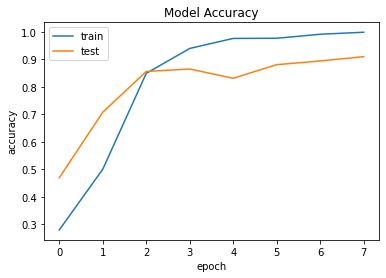

In [19]:
import matplotlib.pyplot as plt
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

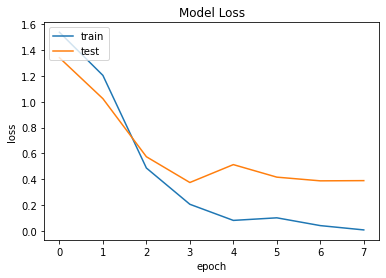

In [20]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()